# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Standard Section 1: Introduction to Web Scraping

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner<br/>
**Section Leaders**: Marios Mattheakis, Hayden Joy<br/>



<hr style='height:2px'>

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

## Section Learning Objectives

When we're done today, you will approach messy real-world data with confidence that you can get it into a format that you can manipulate.

Specifically, our learning objectives are:
* Understand the tree-like structure of an HTML document and use that structure to extract desired information
* Use Python data structures such as lists, dictionaries, and Pandas DataFrames to store and manipulate information

* Practice using [Python](https://docs.python.org/3.6/) packages such as [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [Pandas](https://pandas.pydata.org/pandas-docs/stable/), including how to navigate their documentation to find functionality.

* Identify some other (semi-)structured formats commonly used for storing and transferring data, such as JSON and CSV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests


import json
from IPython.display import HTML

In [3]:
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
%matplotlib inline 

requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore")

## Section Data Analysis Questions

Is science becoming more collaborative over time? How about literature? Are there a few "geniuses" or lots of hard workers? One way we might answer those questions is by looking at Nobel Prizes. We could ask questions like:

* 1) Has anyone won a prize more than once?
* 2) How has the total number of recipients changed over time?
* 3) How has the number of recipients per award changed over time?


To answer these questions, we'll need data: *who* received *what* award and *when*. 

Before we dive into acquiring this data the way we've been teaching in class, let's pause to ask: **what are 5 different approaches we could take to acquiring Nobel Prize data**?

## When possible: find a structured dataset (.csv, .json, .xls)

After a google search we stumble upon this [dataset on github](https://github.com/OpenRefine/OpenRefine/blob/master/main/tests/data/nobel-prize-winners.csv). It is also in the section folder named `github-nobel-prize-winners.csv`.

We use pandas to read it: 

In [4]:
df = pd.read_csv("../data/github-nobel-prize-winners.csv")
df.head() #pandas is a very useful package

,year,discipline,winner,desc
0,1901,chemistry,Jacobus H. van 't Hoff,in recognition of the extraordinary services h...
1,1901,literature,Sully Prudhomme,in special recognition of his poetic compositi...
2,1901,medicine,Emil von Behring,"for his work on serum therapy, especially its ..."
3,1901,peace,Henry Dunant,NaN
4,1901,peace,Fr&eacute;d&eacute;ric Passy,NaN


Or you may want to read an xlsx file:

(Potential missing package; you might need to run the following command in your terminal first: ```!conda install xlrd```)

In [5]:
!conda install --yes xlrd 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\yichu\anaconda3\envs\cs109a

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-1.2.0                 |           py37_0         180 KB
    ------------------------------------------------------------
                                           Total:         180 KB

The following NEW packages will be INSTALLED:

  xlrd               pkgs/main/win-64::xlrd-1.2.0-py37_0




xlrd-1.2.0           | 180 KB    |            |   0% 
xlrd-1.2.0           | 180 KB    | #######1   |  71% 
xlrd-1.2.0           | 180 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda




In [6]:
df = pd.read_excel("../data/github-nobel-prize-winners.xlsx")
df.tail()

,year,discipline,winner,desc
848,2007,medicine,Oliver Smithies,for their discoveries of principles for introd...
849,2007,peace,Intergovernmental Panel on Climate Change (IPCC),for their efforts to build up and disseminate ...
850,2007,peace,Albert Arnold (Al) Gore Jr.,for their efforts to build up and disseminate ...
851,2007,physics,Albert Fert,for the discovery of Giant Magnetoresistance
852,2007,physics,Peter Gr&Atilde;&frac14;nberg,for the discovery of Giant Magnetoresistance


### introducing types

In [ ]:
#type(df.winner)
#type(df)

## Research Question 1: Did anyone recieve the Nobel Prize more than once?

**How would you check if anyone recieved more than one nobel prize?**

In [7]:
# initialize the list storing all the names 
name_winners = []

for name in df.winner:
    
    # Check if we already encountered this name: 
    if name in name_winners:
        
        # if so, print the name
        print(name)
    else:
        # otherwise append the name to the list
        name_winners.append(name)

Marie Curie
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
International Committee of the Red Cross
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
Li

**We don't want to print "No Prize was Awarded" all the time.**

In [8]:
# Your code here
# list storing all the names 
name_winners = []

for name in df.winner:
    
    # Check if we already encountered this name: 
    if name in name_winners and name: 
        # if so, print the name
        print(name)
        
    else:
        # otherwise append the name to the list
        name_winners.append(name)

Marie Curie
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
International Committee of the Red Cross
No Prize was Awarded
No Prize was Awarded
No Prize was Awarded
Li

#### we can use .split() on a string to separate the words into individual strings and store them in a list.


In [9]:
UN_string = "Office of the United Nations"
print(UN_string.split())
#n_words = len(UN_string.split())
#print("Number of words: " + str(n_words));

['Office', 'of', 'the', 'United', 'Nations']


**Even better:**

In [10]:
name_winners = []

for name in df.winner:
    
    # Check if we already encountered this name: 
    if name in name_winners and len(name.split()) <= 2: 
        # if so, print the name
        print(name)
        
    else:
        # otherwise append the name to the list
        name_winners.append(name)

Marie Curie
Linus Pauling
John Bardeen
Frederick Sanger


**How can we make this into a oneligner?**

List comprehension form: [f(x) for x in list]

In [11]:
winners = []
[print(name) if (name in winners and len(name.split()) <= 2) 
 else winners.append(name) for name in df.winner];

Marie Curie
Linus Pauling
John Bardeen
Frederick Sanger


In [12]:
HTML('<figure> \
         <img src="images/Curie.jpg" width="200" class="center" /> \
             <figcaption>Marie Curie recieved the nobel prize in physics in 1903 and chemistry in 1911. <br>\
                         She is one of only four people to recieve two Nobel Prizes.\
             </figcaption> \
      </figure>')

# Part 2: WEB SCRAPING


## The first step in web scraping is to look for structure in the html. Lets look at a real website: 

The official <a href = https://www.nobelprize.org/prizes/lists/all-nobel-prizes/> Nobel website </a> has the data we want, but in 2018 and 2019 the physics prize was awarded to multiple groups so we will use an archived version of the web-page for an easier introduction to web scraping.


The Internet Archive periodically crawls most of the Internet and saves what it finds. (That's a lot of data!) So let's grab the data from the Archive's "Wayback Machine" (great name!). We've just given you the direct URL, but at the very end you'll see how we can get it out of a JSON response from the Wayback Machine API.


Let's take a look at the [2018 version of the Nobel website](http://web.archive.org/web/20180820111639/https://www.nobelprize.org/prizes/lists/all-nobel-prizes/) and to look at the underhood HTML: right-click and click on `inspect` . Try to find structure in the tree-structured HTML.

Play around! (give floor to the students)

In [ ]:
###################################################

# The first step of web scraping is to write down the structure of the web page
### Here some quick recap of HTML tags and what they do in the context of this notebook:

HTML tags are opened and closed as follows: \<h3> some text \<\h3>. 

Here are a list of few tags, their definitions and what information they contain in our problem today:


**\<h3> : header 3 tag** tag is a header size 3 tag (header 1 is the largest tag). This tag will contain the title and year of the nobel prize, which we will parse out. <br>
**\<h6> : header 6 tag** tag (smaller than header 3) will contain the prize recipients <br>
**\<p> : paragraph tag** tags used for text, contains the prize motivation <br>
**\<div class ="Class: by year">** "Content Division element ( \<div> ) is the generic container for flow content." What we care about here is the class attribute, which we will use with beautiful soup to quickly parse information which we want. The class attribute could be attatched to any tag.

***Paying attention to tags with class attributes is key to the homework.***

In [13]:
# here is what we will get after selecting using the class by year tag.

einstein = HTML('\
         <div class ="Class: by year">  \
             <h3> \
                 <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/physics/laureates/1921/"> \
                        The Nobel Prize in Physics 1921 \
                  </a> \
             </h3> \
             <h6> \
                 <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/physics/laureates/1921/einstein-facts.html">\
                        Albert Einstein</a> \
             </h6> \
             <p> \
                 “for his services to Theoretical Physics, and especially for his discovery of the law of the photoelectric effect” \
             </p> \
        ')
display(einstein)

In [14]:
snapshot_url = 'http://web.archive.org/web/20180820111639/https://www.nobelprize.org/prizes/lists/all-nobel-prizes/'

In [15]:
snapshot = requests.get(snapshot_url)
snapshot

<Response [200]>

Response [200] is a success status code. Let's google: [`response 200 meaning`](https://www.google.com/search?q=response+200+meaning&oq=response+%5B200%5D+m&aqs=chrome.1.69i57j0l5.6184j0j7&sourceid=chrome&ie=UTF-8). All possible codes [here](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status).

In [16]:
type(snapshot)

requests.models.Response

Try to request "www.xoogle.be". What happens?

In [17]:
snapshot_url2 = 'http://web.archive.org/web/20180820111639/https://www.xoogle.be'
snapshot = requests.get(snapshot_url2)
snapshot

<Response [404]>

Always remember to “not to be evil” when scraping with requests! If downloading multiple pages (like you will be on HW1), always put a delay between requests (e.g, `time.sleep(1)`, with the `time` library) so you don’t unwittingly hammer someone’s webserver and/or get blocked.

In [20]:
snapshot = requests.get(snapshot_url)
raw_html = snapshot.text
print(raw_html[500:])

 charset="utf-8"></script>
<script type="text/javascript" src="/_static/js/wombat.js?v=cRqOKCOw" charset="utf-8"></script>
<script type="text/javascript">
  __wm.init("http://web.archive.org/web");
  __wm.wombat("https://www.nobelprize.org/prizes/lists/all-nobel-prizes/","20180820111639","http://web.archive.org/web/","web","/_static/",
	      "1534763799","www.nobelprize.org");
</script>
<link rel="stylesheet" type="text/css" href="/_static/css/banner-styles.css?v=NHuXCfBH" />
<link rel="stylesheet" type="text/css" href="/_static/css/iconochive.css?v=qtvMKcIJ" />
<!-- End Wayback Rewrite JS Include -->


		<meta charset="UTF-8"><script type="text/javascript">window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var o=t[n]={exports:{}};e[n][0].call(o.exports,function(t){var o=e[n][1][t];return r(o||t)},o,o.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(e,t,n){function r

## Regular Expressions
You can find specific patterns or strings in text by using Regular Expressions: This is a pattern matching mechanism used throughout Computer Science and programming (it's not just specific to Python). Some great resources that we recommend, if you are interested in them (could be very useful for a homework problem):
- https://docs.python.org/3.3/library/re.html
- https://regexone.com
- https://docs.python.org/3/howto/regex.html.

Specify a specific sequence with the help of regex special characters. Some examples: 
- ```\S``` : Matches any character which is not a Unicode whitespace character
- ```\d``` : Matches any Unicode decimal digit 
- ```*``` : Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible.

**Let's find all the occurances of 'Marie' in our raw_html:**

In [18]:
import re 

In [21]:
re.findall(r'Marie', raw_html)
# The solution is to use Python’s raw string notation for regular expression patterns; backslashes are not handled in any special way in a string literal prefixed with 'r'. So r"\n" is a two-character string containing '\' and 'n', while "\n" is a one-character string containing a newline. Usually patterns will be expressed in Python code using this raw string notation.

['Marie', 'Marie', 'Marie', 'Marie', 'Marie', 'Marie']

**Using ```\S``` to match 'Marie' + ' ' + 'any character which is not a Unicode whitespace character':**

In [22]:
re.findall(r'Marie \S',raw_html) # look for first non-white character

['Marie G', 'Marie L', 'Marie C', 'Marie B', 'Marie F', 'Marie C']

**How would we find the lastnames that come after Marie?**

ANSWER: the \w character represents any alpha-numeric character. \w* is greedy and gets a repeat of the characters until the next bit of whitespace.

In [23]:
# Your code here
last_names = re.findall(r'Marie \w*', raw_html)
display(last_names)

['Marie Gustave',
 'Marie Lehn',
 'Marie Curie',
 'Marie Bernhard',
 'Marie François',
 'Marie Curie']

Now, we have all our data in the notebook. Unfortunately, it is the form of one really long string, which is hard to work with directly. This is where BeautifulSoup comes in.  

### This is an example of code that grabs the first title. Regex can quickly become complex, which motivates beautiful soup.

In [25]:
first_title = re.findall(r'<h3><a.*>.*<\/a><\/h3>', raw_html)[0]
print(first_title)

#you can do this via regex, but it gets complicated fast! This motivates Beautiful Soup.

<h3><a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/physics/laureates/2018/">The Nobel Prize in Physics 2018</a></h3>


In [24]:
first_title = re.findall(r'<h3><a.*>(.*)<\/a><\/h3>', raw_html)[0]
print(first_title)

The Nobel Prize in Physics 2018


## Parse the HTML with BeautifulSoup

In [26]:
soup = BeautifulSoup(raw_html, 'html.parser')

In [28]:
soup

 <!DOCTYPE html>

<html class="no-js" lang="en-US" prefix="og: http://ogp.me/ns#">
<head><script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript"></script>
<script type="text/javascript">window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app56.us.archive.org';v.server_ms=313;archive_analytics.send_pageview({});});</script><script charset="utf-8" src="/_static/js/playback.bundle.js?v=qchdzUCo" type="text/javascript"></script>
<script charset="utf-8" src="/_static/js/wombat.js?v=cRqOKCOw" type="text/javascript"></script>
<script type="text/javascript">
  __wm.init("http://web.archive.org/web");
  __wm.wombat("https://www.nobelprize.org/prizes/lists/all-nobel-prizes/","20180820111639","http://web.archive.org/web/","web","/_static/",
	      "1534763799","www.nobelprize.org");
</script>
<link href="/_static/css/banner-styles.css?v=NHuXCfBH" rel="stylesheet" type="text/css"/>
<link href="/_static/c

Key BeautifulSoup functions we’ll be using in this section:
- **`tag.prettify()`**: Returns cleaned-up version of raw HTML, useful for printing
- **`tag.select(selector)`**: Return a list of nodes matching a [CSS selector](https://developer.mozilla.org/en-US/docs/Learn/CSS/Introduction_to_CSS/Simple_selectors)
- **`tag.select_one(selector)`**: Return the first node matching a CSS selector
- **`tag.text/soup.get_text()`**: Returns visible text of a node (e.g.,"`<p>Some text</p>`" -> "Some text")
- **`tag.contents`**: A list of the immediate children of this node

You can also use these functions to find nodes.
- **`tag.find_all(tag_name, attrs=attributes_dict)`**: Returns a list of matching nodes
- **`tag.find(tag_name, attrs=attributes_dict)`**: Returns first matching node

BeautifulSoup is a very powerful library -- much more info here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### Let's practice some BeautifulSoup commands...

**Print a cleaned-up version of the raw HTML** Which function should we use from above?

In [29]:
pretty_soup = soup.prettify()
print(pretty_soup[:500]) #what about negative indices?

<!DOCTYPE html>
<html class="no-js" lang="en-US" prefix="og: http://ogp.me/ns#">
 <head>
  <script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript">
  </script>
  <script type="text/javascript">
   window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app56.us.archive.org';v.server_ms=313;archive_analytics.send_pageview({});});
  </script>
  <script charset="utf-8" src="/_static/js/playback.bundle.js?v=qc


**Find the first “title” object** 

In [30]:
# Your code here
soup.select("h3 a")

[<a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/physics/laureates/2018/">The Nobel Prize in Physics 2018</a>,
 <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/chemistry/laureates/2018/">The Nobel Prize in Chemistry 2018</a>,
 <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/2018/">The Nobel Prize in Physiology or Medicine 2018</a>,
 <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/literature/laureates/2018/">The Nobel Prize in Literature 2018</a>,
 <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/peace/laureates/2018/">The Nobel Peace Prize 2018</a>,
 <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/economics/laureates/2018/">The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel 2018</a>,
 <a hre

**Extract the text of first “title” object** 

In [ ]:
#Your code here

## Extracting award data

Let's use the structure of the HTML document to extract the data we want.

From inspecting the page in DevTools, we found that each award is in a `div` with a `by_year` class. Let's get all of them.

In [31]:
award_nodes = soup.select('.by_year') #<div class ="by year"
len(award_nodes)
# when target class category, we will add '.'


640

Let's pull out an example.

In [32]:
award_node = award_nodes[200]

In [33]:
HTML(award_node.prettify())


**Magic commands:**

In [34]:
# show ls, tree, mkdir

SyntaxError: invalid syntax (<ipython-input-34-502b20b4ccb5>, line 1)

#### Let's practice getting data out of a BS Node


### The prize title

In [35]:
award_node.select_one('h3').text

'The Nobel Prize in Physiology or Medicine 1985'

**How do we separate the year from the selected prize title?**

In [36]:
# %load solutions/sol2.py
award_node.select_one('h3').text[-4:] # go from the -4 element to the end

'1985'

**How do we drop the year from the title?**

In [37]:
award_node.select_one('h3').text[:-4].strip()

'The Nobel Prize in Physiology or Medicine'

Let's put them into functions:

In [38]:
# %load solutions/sol_functions.py
def get_award_title(award_node):
    return award_node.select_one('h3').text[:-4].strip()

def get_award_year(award_node):
    return int(award_node.select_one('h3').text[-4:])

**Make a list of titles for all awards**

In [39]:
#original code:
list_awards = []
for award_node in award_nodes:
    list_awards.append(get_award_title(award_node))
list_awards

['The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'Th

**Let's use list comprehension:**

In [40]:
# Your code here
[get_award_title(award_node) for award_node in award_nodes ]


['The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'Th

### The recipients
**How do we handle there being more than one?**

In [41]:
award_node.select('h6 a')

[<a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/peace/laureates/1901/dunant-facts.html">Jean Henry Dunant</a>,
 <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/peace/laureates/1901/passy-facts.html">Frédéric Passy</a>]

In [42]:
[node.text for node in award_node.select('h6 a')]

['Jean Henry Dunant', 'Frédéric Passy']

We'll leave them as a list for now, to return to this later.

***This is how you would get the links: (Relevant for the homework)***

In [43]:
[state_node.get("href") for state_node in award_node.select('h6 a')]

['http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/peace/laureates/1901/dunant-facts.html',
 'http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/peace/laureates/1901/passy-facts.html']

### The prize "motivation"

**How would you get the 'motivation'/reason of the prize from the following ```award_node```?**

In [44]:
award_node = award_nodes[200]
award_node

<div class="by_year">
<h3><a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/">The Nobel Prize in Physiology or Medicine 1985</a></h3>
<h6><a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/brown-facts.html">Michael S. Brown</a> and <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/goldstein-facts.html">Joseph L. Goldstein</a></h6>
<p>“for their discoveries concerning the regulation of cholesterol metabolism”</p>
</div>

In [45]:
# Your code here
print(award_node.select('p')[0].text);

“for their discoveries concerning the regulation of cholesterol metabolism”


Putting everything into functions: 

In [46]:
def get_award_motivation(award_node):
    award_node = award_node.select_one('p')
    if not award_node: #0, [], None, and {} all default to False in a python conditional statement.
        return None
    return award_node.text 

# Break Out Room 1: Practice with CSS selectors, Functions and list comprehension

In [47]:
print(award_nodes[200])

<div class="by_year">
<h3><a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/">The Nobel Prize in Physiology or Medicine 1985</a></h3>
<h6><a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/brown-facts.html">Michael S. Brown</a> and <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/goldstein-facts.html">Joseph L. Goldstein</a></h6>
<p>“for their discoveries concerning the regulation of cholesterol metabolism”</p>
</div>


## **Exercise 1.1: complete the following function by assigning the proper CSS-selector so that it returns a list of nobel prize award recipients.**
Hint: you can specify multiple selectors separated by a space.

#### To load the first exercise by deleting the "#" and typing shift-enter to run the cell
clicking on "cell" -> "run all above" is also very helpful to run many cells of the notebook at once.

In [49]:
# %load exercises/exercise1.py
def get_recipients(award_node):
    """
    This function returns a list of nobel prize award recipients from a specified html award node.
    """
    css_selector = 'h6 a' #TODO
    recipients = []
    for node in award_node.select(css_selector):
        recipients.append(node.text)
    return(recipients)
    
get_recipients(award_nodes[200])

['Michael S. Brown', 'Joseph L. Goldstein']

## Exercise 1.2: Change the above function so it uses list comprehension.
To load the execise simply delete the '#' in the code below and run the cell.

In [53]:
# %load exercises/exercise2.py
def get_recipients(award_node):
    """returns a list of award recipients using list comprehension.

    Args:
        award_node: HTML beautiful soup node of css_selector class <div class="by_year">
    """
    css_selector = 'h6 a'

    #Example form of list comprehension: [reassigned_value for value in list]
    recipients = [node.text for node in award_node.select(css_selector)] #TODO
    return(recipients)

get_recipients(award_nodes[200])

['Michael S. Brown', 'Joseph L. Goldstein']

Don't look at this cell until you've given the exercise a go! It loads the correct solution.

### Exercise 1.2 solution (1.1 solution is contained herein as well)

In [ ]:
# %load solutions/breakoutsol1.py
#!/bin/bash/python3

def get_recipients(award_node):
    """returns a list of nobel prize award recipients from a specified html award node.

    Args:
        award_node: HTML beautiful soup node of css_selector class <div class="by_year">
    """
    css_selector = 'h6 a'
    return [node.text for node in award_node.select(css_selector)]

In [55]:
%run ./solutions/breakoutsol1.py

## Let's create a Pandas dataframe

Now let's get all of the awards.

In [56]:
# list of dictionary
awards = []
for award_node in soup.select('.by_year'):
    recipients = get_recipients(award_node)
    
    #initialize the dictionary
    award = {} #{key: value}
    
    award['title'] = get_award_title(award_node)
    award['year'] = get_award_year(award_node)
    award['recipients'] = recipients
    award['num_recipients'] = len(recipients)
    award['motivation'] = get_award_motivation(award_node)    
    awards.append(award)
awards[0:2]

[{'title': 'The Nobel Prize in Physics',
  'year': 2018,
  'recipients': [],
  'num_recipients': 0,
  'motivation': 'The 2018 Nobel Prize in Physics has not been awarded yet. It will be announced on Tuesday 2 October, 11:45 a.m. at the earliest.'},
 {'title': 'The Nobel Prize in Chemistry',
  'year': 2018,
  'recipients': [],
  'num_recipients': 0,
  'motivation': 'The 2018 Nobel Prize in Chemistry has not been awarded yet. It will be announced on Wednesday 3 October, 11:45 a.m. at the earliest.'}]

In [57]:
df_awards_raw = pd.DataFrame(awards)

In [58]:
#explain open brackets
df_awards_raw
# [] if empty list

,title,year,recipients,num_recipients,motivation
0,The Nobel Prize in Physics,2018,[],0,The 2018 Nobel Prize in Physics has not been a...
1,The Nobel Prize in Chemistry,2018,[],0,The 2018 Nobel Prize in Chemistry has not been...
2,The Nobel Prize in Physiology or Medicine,2018,[],0,The 2018 Nobel Prize in Physiology or Medicine...
3,The Nobel Prize in Literature,2018,[],0,The 2018 Nobel Prize in Literature has been po...
4,The Nobel Peace Prize,2018,[],0,The 2018 Nobel Peace Prize has not been awarde...
...,...,...,...,...,...
635,The Nobel Prize in Physics,1901,[Wilhelm Conrad Röntgen],1,“in recognition of the extraordinary services ...
636,The Nobel Prize in Chemistry,1901,[Jacobus Henricus van ‘t Hoff],1,“in recognition of the extraordinary services ...
637,The Nobel Prize in Physiology or Medicine,1901,[Emil Adolf von Behring],1,"“for his work on serum therapy, especially its..."
638,The Nobel Prize in Literature,1901,[Sully Prudhomme],1,“in special recognition of his poetic composit...


### Some quick EDA.

In [59]:
df_awards_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           640 non-null    object
 1   year            640 non-null    int64 
 2   recipients      640 non-null    object
 3   num_recipients  640 non-null    int64 
 4   motivation      571 non-null    object
dtypes: int64(2), object(3)
memory usage: 25.1+ KB


In [60]:
df_awards_raw.year.min()

1901

**What is going on with the recipients column?**

In [61]:
df_awards_raw.head()

,title,year,recipients,num_recipients,motivation
0,The Nobel Prize in Physics,2018,[],0,The 2018 Nobel Prize in Physics has not been a...
1,The Nobel Prize in Chemistry,2018,[],0,The 2018 Nobel Prize in Chemistry has not been...
2,The Nobel Prize in Physiology or Medicine,2018,[],0,The 2018 Nobel Prize in Physiology or Medicine...
3,The Nobel Prize in Literature,2018,[],0,The 2018 Nobel Prize in Literature has been po...
4,The Nobel Peace Prize,2018,[],0,The 2018 Nobel Peace Prize has not been awarde...


In [62]:
df_awards_raw.num_recipients.value_counts()

1    347
2    138
3    100
0     55
Name: num_recipients, dtype: int64

**Now lets take a look at  num_recipients**

In [63]:
df_awards_raw.num_recipients == 0

0       True
1       True
2       True
3       True
4       True
       ...  
635    False
636    False
637    False
638    False
639    False
Name: num_recipients, Length: 640, dtype: bool

In [64]:
df_awards_raw[df_awards_raw.num_recipients == 0]

,title,year,recipients,num_recipients,motivation
0,The Nobel Prize in Physics,2018,[],0,The 2018 Nobel Prize in Physics has not been a...
1,The Nobel Prize in Chemistry,2018,[],0,The 2018 Nobel Prize in Chemistry has not been...
2,The Nobel Prize in Physiology or Medicine,2018,[],0,The 2018 Nobel Prize in Physiology or Medicine...
3,The Nobel Prize in Literature,2018,[],0,The 2018 Nobel Prize in Literature has been po...
4,The Nobel Peace Prize,2018,[],0,The 2018 Nobel Peace Prize has not been awarde...
5,The Sveriges Riksbank Prize in Economic Scienc...,2018,[],0,The 2018 Prize in Economic Sciences has not be...
280,The Nobel Peace Prize,1972,[],0,No Nobel Prize was awarded this year. The priz...
309,The Nobel Peace Prize,1967,[],0,No Nobel Prize was awarded this year. The priz...
314,The Nobel Peace Prize,1966,[],0,No Nobel Prize was awarded this year. The priz...
364,The Nobel Peace Prize,1956,[],0,No Nobel Prize was awarded this year. The priz...


Ok: 2018 awards have no recipients because this is a 2018 archived version of nobel prize webpage. Some past years lack awards because none were actually awarded that year. Let's keep only meaningful data:

In [65]:
df_awards_past = df_awards_raw[df_awards_raw.year != 2018]
df_awards_past.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 6 to 639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           634 non-null    object
 1   year            634 non-null    int64 
 2   recipients      634 non-null    object
 3   num_recipients  634 non-null    int64 
 4   motivation      565 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.7+ KB


Hm, `motivation` has a different number of items... why?

In [66]:
df_awards_past[df_awards_past.motivation.isnull()]

,title,year,recipients,num_recipients,motivation
178,The Nobel Peace Prize,1989,[The 14th Dalai Lama (Tenzin Gyatso) ],1,None
184,The Nobel Peace Prize,1988,[United Nations Peacekeeping Forces ],1,None
196,The Nobel Peace Prize,1986,[Elie Wiesel],1,None
202,The Nobel Peace Prize,1985,[International Physicians for the Prevention o...,1,None
208,The Nobel Peace Prize,1984,[Desmond Mpilo Tutu],1,None
...,...,...,...,...,...
619,The Nobel Peace Prize,1905,"[Baroness Bertha Sophie Felicita von Suttner, ...",1,None
624,The Nobel Peace Prize,1904,[Institut de droit international (Institute of...,1,None
629,The Nobel Peace Prize,1903,[William Randal Cremer],1,None
634,The Nobel Peace Prize,1902,"[Élie Ducommun, Charles Albert Gobat]",2,None


Looks like it's fine that those motivations were missing.

**Sort the awards by year.**

In [67]:
# use "shift-tab" twice to see the default and options
df_awards_past.sort_values('year').head()

,title,year,recipients,num_recipients,motivation
639,The Nobel Peace Prize,1901,"[Jean Henry Dunant, Frédéric Passy]",2,None
635,The Nobel Prize in Physics,1901,[Wilhelm Conrad Röntgen],1,“in recognition of the extraordinary services ...
638,The Nobel Prize in Literature,1901,[Sully Prudhomme],1,“in special recognition of his poetic composit...
637,The Nobel Prize in Physiology or Medicine,1901,[Emil Adolf von Behring],1,"“for his work on serum therapy, especially its..."
636,The Nobel Prize in Chemistry,1901,[Jacobus Henricus van ‘t Hoff],1,“in recognition of the extraordinary services ...


### How many awards of each type were given?

In [68]:
df_awards_past.title.value_counts()

The Nobel Prize in Chemistry                                                  117
The Nobel Prize in Physics                                                    117
The Nobel Prize in Literature                                                 117
The Nobel Prize in Physiology or Medicine                                     117
The Nobel Peace Prize                                                         117
The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel     49
Name: title, dtype: int64

But wait, that includes the years the awards weren't offered.

In [69]:
df_awards_actually_offered = df_awards_past[df_awards_past.num_recipients > 0]
df_awards_actually_offered.title.value_counts()

The Nobel Prize in Physics                                                    111
The Nobel Prize in Literature                                                 110
The Nobel Prize in Chemistry                                                  109
The Nobel Prize in Physiology or Medicine                                     108
The Nobel Peace Prize                                                          98
The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel     49
Name: title, dtype: int64

### When was each award first given?

In [70]:
df_awards_actually_offered.groupby('title').year

In [71]:
df_awards_actually_offered.groupby('title').year.describe() # we will use this information later!

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
The Nobel Peace Prize,98.0,1962.897959,34.909157,1901.0,1933.25,1966.5,1992.75,2017.0
The Nobel Prize in Chemistry,109.0,1961.201835,33.999123,1901.0,1932.00,1963.0,1990.00,2017.0
The Nobel Prize in Literature,110.0,1960.636364,34.221547,1901.0,1930.25,1962.5,1989.75,2017.0
The Nobel Prize in Physics,111.0,1960.351351,34.248198,1901.0,1929.50,1962.0,1989.50,2017.0
The Nobel Prize in Physiology or Medicine,108.0,1961.740741,33.744884,1901.0,1933.75,1963.5,1990.25,2017.0
The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel,49.0,1993.000000,14.288690,1969.0,1981.00,1993.0,2005.00,2017.0


## How many recipients per year?

Let's include the years with missing awards; if we were to analyze further, we'd have to decide whether to include them.

A good plot that clearly reveals patterns in the data is very important. Is this a good plot or not?

<AxesSubplot:xlabel='year', ylabel='num_recipients'>

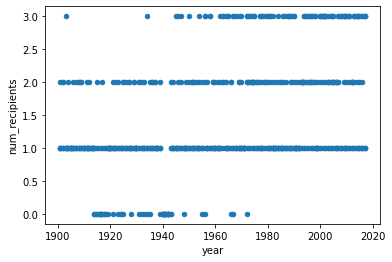

In [72]:
df_awards_past.plot.scatter(x='year', y='num_recipients') #explain scatterplot

It's hard to see a trend when there are multiple observations per year (**why?**).

Let's try looking at *total* num recipients by year.

<h6 style="color:blue;"> Lets explore how important a good plot can be</h6>

In [73]:
df_awards_past.groupby('year').num_recipients.sum()

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2013    13
2014    13
2015    11
2016    11
2017    12
Name: num_recipients, Length: 117, dtype: int64

In [75]:
df_awards_past.head()

,title,year,recipients,num_recipients,motivation
6,The Nobel Prize in Physics,2017,"[Rainer Weiss, Barry C. Barish, Kip S. Thorne]",3,“for decisive contributions to the LIGO detect...
7,The Nobel Prize in Chemistry,2017,"[Jacques Dubochet, Joachim Frank, Richard Hend...",3,“for developing cryo-electron microscopy for t...
8,The Nobel Prize in Physiology or Medicine,2017,"[Jeffrey C. Hall, Michael Rosbash, Michael W. ...",3,“for their discoveries of molecular mechanisms...
9,The Nobel Prize in Literature,2017,[Kazuo Ishiguro],1,"“who, in novels of great emotional force, has ..."
10,The Nobel Peace Prize,2017,[International Campaign to Abolish Nuclear Wea...,1,“for its work to draw attention to the catastr...


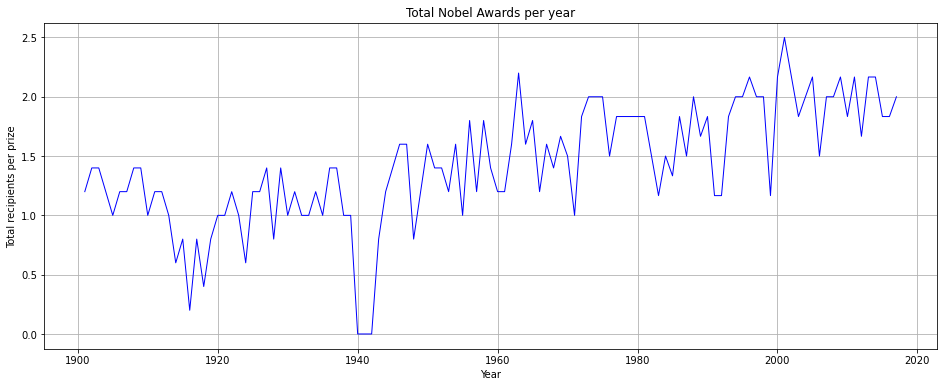

In [74]:
plt.figure(figsize=[16,6])
plt.plot(df_awards_past.groupby('year').num_recipients.mean(), 'b', linewidth='1')


plt.title('Total Nobel Awards per year')
plt.xlabel('Year')
plt.ylabel('Total recipients per prize')
plt.grid('on')
plt.show()

Check out the years 1940-43? Any comment? 

Any trends the last 25 years?

In [76]:
set(df_awards_past.title)

{'The Nobel Peace Prize',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Literature',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Physiology or Medicine',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel'}

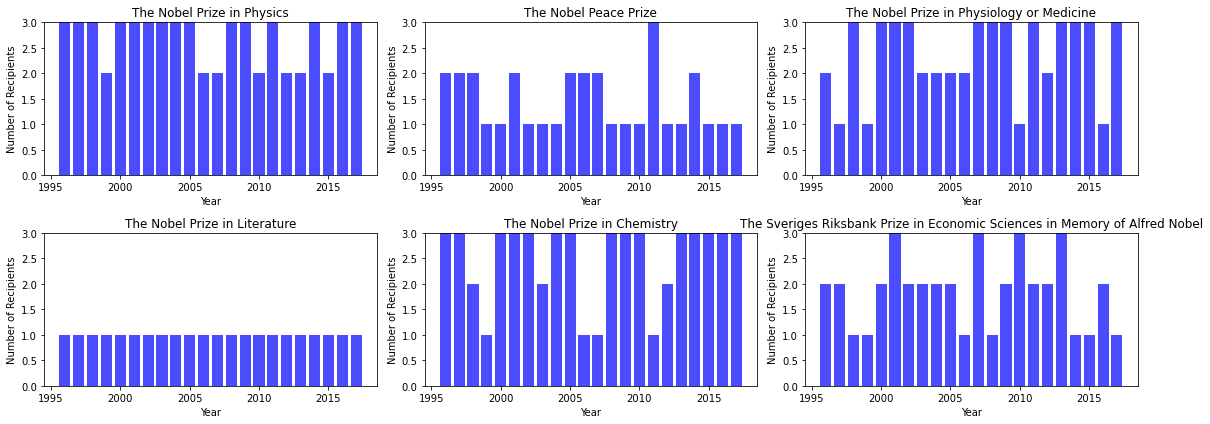

In [77]:
plt.figure(figsize=[16,6])
i = 0
for award in set(df_awards_past.title):
    i += 1
    year = df_awards_past[df_awards_past['title']==award].year
    recips = df_awards_past[df_awards_past['title']==award].num_recipients
    index = year > 2020 - 25
    years_filtered  = year[index].values
    recips_filtered = recips[index].values
    
    plt.subplot(2,3,i)
    plt.bar(years_filtered, recips_filtered, color='b', alpha = 0.7)
    plt.title(award)
    plt.xlabel('Year')
    plt.ylabel('Number of Recipients')
    plt.ylim(0, 3)
plt.tight_layout()

## A cleaner way to iterate and keep tabs: the ***enumerate( )*** function

###  'How has the number of recipients per award changed over time?'

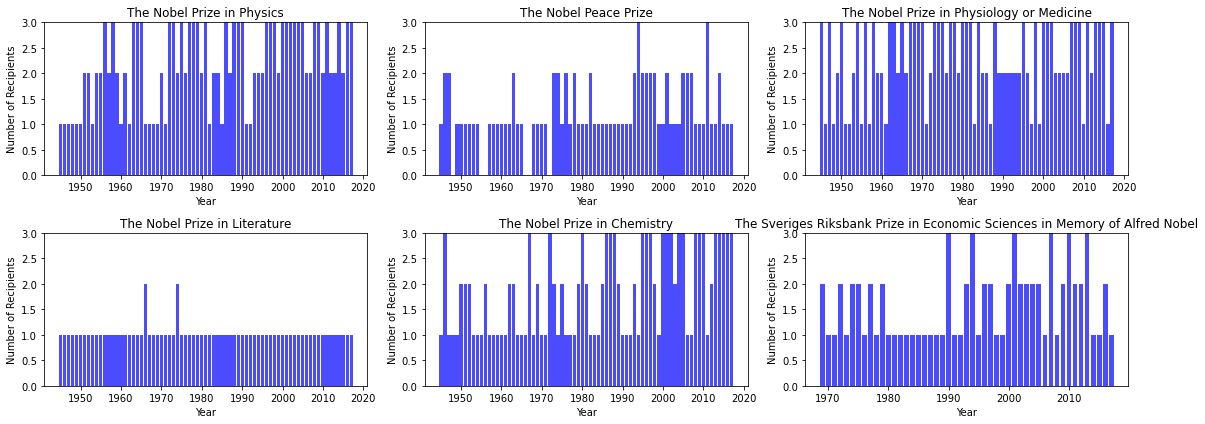

In [78]:
# The enumerate function allows us to delete two lines of code 
# The number of years shown is increased to 75 so we can see the trend.
plt.figure(figsize=[16,6])

for i, award in enumerate(set(df_awards_past.title), 1): ################### <--- enumerate
    year = df_awards_past[ df_awards_past['title'] == award].year
    recips = df_awards_past[ df_awards_past['title'] == award].num_recipients
    index = year > 2019 - 75                   ########################### <--- extend the range
    years_filtered = year[index].values
    recips_filtered = recips[index].values
    
    #plot:
    plt.subplot(2, 3, i) #arguments (nrows, ncols, index)
    plt.bar(years_filtered, recips_filtered, color='b', alpha = 0.7)
    plt.title(award)
    plt.xlabel('Year')
    plt.ylabel('Number of Recipients')
    plt.ylim(0, 3)

plt.tight_layout()

----------------
### End of Standard Section
---------------

## Break Out Room II: Dictionaries, dataframes, and Pyplot

## **Exercise 2.1 (practice creating a dataframe): Build a dataframe of famous physicists from the following lists. **
Your dataframe should have the following columns: "name", "year_prize_awarded" and "famous_for".

In [79]:
famous_award_winners = ["Marie Curie", "Albert Einstein", "James Chadwick", "Werner Karl Heisenberg"] 
nobel_prize_dates    = [1923, 1937, 1940, 1934]
famous_for           = ["spontaneous radioactivity", "general relativity", "strong nuclear force",
                        "uncertainty principle"]

In [83]:
#initialize dictionary
famous_physicists = {}
famous_physicists['name'] = famous_award_winners
famous_physicists['year'] = nobel_prize_dates
famous_physicists['famous_for'] = famous_for
df_famous_physicists = pd.DataFrame(famous_physicists)
df_famous_physicists

,name,year,famous_for
0,Marie Curie,1923,spontaneous radioactivity
1,Albert Einstein,1937,general relativity
2,James Chadwick,1940,strong nuclear force
3,Werner Karl Heisenberg,1934,uncertainty principle


In [85]:
df_awards_past.head()

,title,year,recipients,num_recipients,motivation
6,The Nobel Prize in Physics,2017,"[Rainer Weiss, Barry C. Barish, Kip S. Thorne]",3,“for decisive contributions to the LIGO detect...
7,The Nobel Prize in Chemistry,2017,"[Jacques Dubochet, Joachim Frank, Richard Hend...",3,“for developing cryo-electron microscopy for t...
8,The Nobel Prize in Physiology or Medicine,2017,"[Jeffrey C. Hall, Michael Rosbash, Michael W. ...",3,“for their discoveries of molecular mechanisms...
9,The Nobel Prize in Literature,2017,[Kazuo Ishiguro],1,"“who, in novels of great emotional force, has ..."
10,The Nobel Peace Prize,2017,[International Campaign to Abolish Nuclear Wea...,1,“for its work to draw attention to the catastr...


## **Exercise 2.2:** Make a bar plot of the total number of Nobel prizes awarded per field. Make sure to use the 'group by' function to achieve this.


Text(0.5, 1.0, 'Total number of Number Prize Winnder recipients')

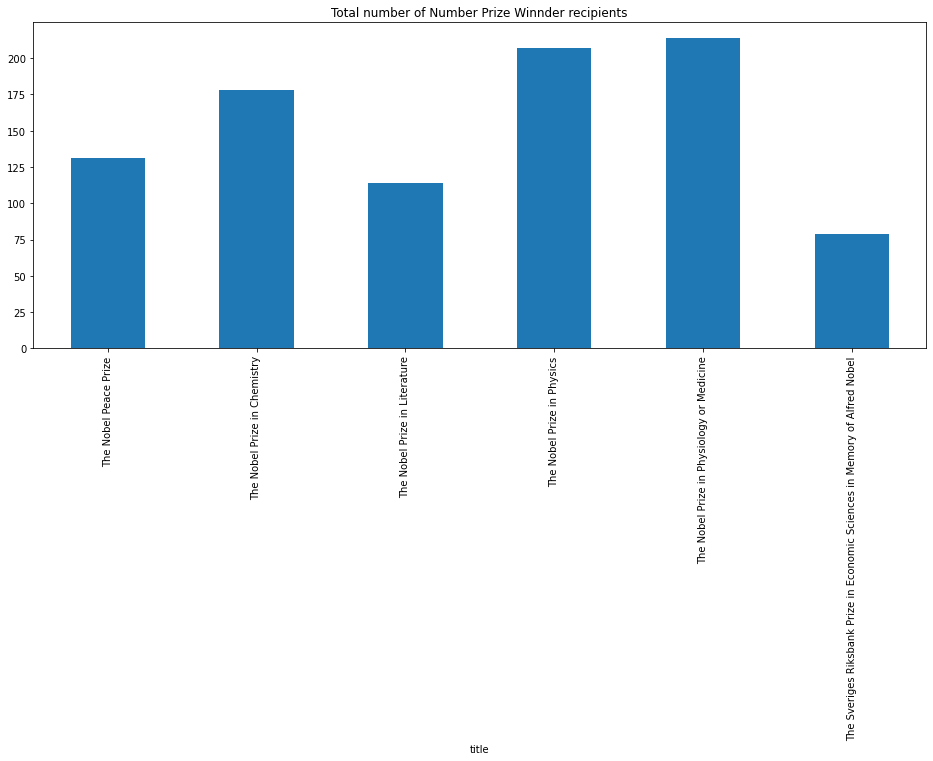

In [87]:
#create the figure:
plt.figure(figsize=[16,6])
#group by command:
gb_title=df_awards_past.groupby('title').num_recipients.sum()

#TODO
gb_title.plot.bar()
plt.title("Total number of Number Prize Winnder recipients")

# Solutions:
## Exercise 2.1 Solutions

In [ ]:
# %load solutions/exercise2.1sol
famous_physicists["name"] = famous_award_winners
famous_physicists["year_prize_awarded"] = nobel_prize_dates
famous_physicists["famouse_for"] = famous_for
pd.DataFrame(famous_physicists)

## Exercise 2.2 Solutions

In [ ]:
# %load solutions/exercise2.2sol_vanilla
#Vanilla Plot 

plt.figure(figsize=[16,6])

#key line: group by:
gb_Title = df_awards_past.groupby('title').num_recipients.sum()


gb_Title.plot.bar()
plt.title("Total number of Nobel Prize winner recipients")

Text(0, 0.5, 'Mean number of prizes awarded')

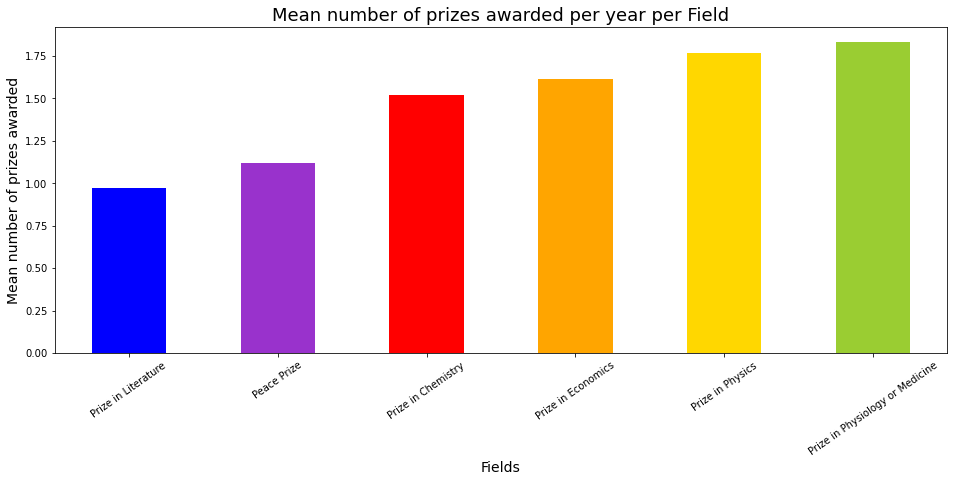

In [91]:
# %load solutions/exercise2.2sol_improved
#Better Plot:

#set the figure size
plt.figure(figsize=[16,6])

gb_Title = df_awards_past.groupby('title').num_recipients.mean().sort_values( ascending = True)

#Abbreviate the Titles:
new_index = []
for i, title in enumerate(gb_Title.index):
    if "Economic" in title:
        title = "The Nobel Prize in Economics" 
    new_index.append(re.findall(r'[N][o][b][e][l]\s(.*)', title)[0]) #grab the part of the string after "Nobel "
gb_Title.index = new_index #reassign the index

# Matplotlib colors: https://matplotlib.org/examples/color/named_colors.html
# b : blue.
# g : green.
# r : red.
# c : cyan.
# m : magenta.
# y : yellow.
# k : black.
# w : white.

gb_Title.plot.bar( rot = 35, color = ["blue", "darkorchid", "r", "orange", "gold", "yellowgreen" ])
#assign labels
plt.title("Mean number of prizes awarded per year per Field", fontsize = 18)
plt.xlabel("Fields", fontsize = 14)
plt.ylabel("Mean number of prizes awarded", fontsize = 14)

***Food for thought: Is the prize in Economics more collaborative, or just more modern?***

## Extra: Did anyone recieve the Nobel Prize more than once (based upon scraped data)?

Here's where it bites us that our original DataFrame isn't "tidy". Let's make a tidy one.

A great scientific article describing tidy data by Hadley Wickam: https://vita.had.co.nz/papers/tidy-data.pdf

In [92]:
tidy_awards = []
for idx, row in df_awards_past.iterrows():
    for recipient in row['recipients']:
        tidy_awards.append(dict(
            recipient = recipient,
            year = row['year']))
tidy_awards_df = pd.DataFrame(tidy_awards)
tidy_awards_df

,recipient,year
0,Rainer Weiss,2017
1,Barry C. Barish,2017
2,Kip S. Thorne,2017
3,Jacques Dubochet,2017
4,Joachim Frank,2017
...,...,...
918,Jacobus Henricus van ‘t Hoff,1901
919,Emil Adolf von Behring,1901
920,Sully Prudhomme,1901
921,Jean Henry Dunant,1901


Now we can look at each recipient individually.

In [93]:
tidy_awards_df.recipient.value_counts()

Comité international de la Croix Rouge (International Committee of the Red Cross)     3
Frederick Sanger                                                                      2
Linus Carl Pauling                                                                    2
John Bardeen                                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                   2
                                                                                     ..
Phillip A. Sharp                                                                      1
Oliver Hart                                                                           1
Werner Karl Heisenberg                                                                1
Luigi Pirandello                                                                      1
Jan Tinbergen                                                                         1
Name: recipient, Length: 916, dt

## End of Normal Section

## Optional Further Readings

Harvard Professor <a>Sean Eddy</a> in the micro and chemical Biology department at Harvard teaches a great course called <a href = "http://mcb112.org/">MCB-112: Biological Data Science</a>. His course is difficult but a great complement to CS109a and is also taught in python.

Here are a couple resources that he referenced early in his course that helped solidify my understanding of data science.

<a href="https://www.tandfonline.com/doi/full/10.1080/10618600.2017.1384734">50 Years of Data Science</a> by Dave Donoho  (2017)

<a href="https://vita.had.co.nz/papers/tidy-data.pdf"> Tidy data</a> by Hadley Wickam (2014)

## Extra Material: Other structured data formats (JSON and CSV)

### CSV
CSV is a lowest-common-denominator format for tabular data.

In [ ]:
df_awards_past.to_csv('../data/awards.csv', index=False)
with open('../data/awards.csv', 'r') as f:
    print(f.read()[:1000])

It loses some info, though: the recipients list became a plain string, and the reader needs to guess whether each column is numeric or not.

In [ ]:
pd.read_csv('../data/awards.csv').recipients.iloc[20]

### JSON

JSON preserves structured data, but fewer data-science tools speak it.

In [ ]:
df_awards_past.to_json('../data/awards.json', orient='records')

with open('../data/awards.json', 'r') as f:
    print(f.read()[:1000])

Lists and other basic data types are preserved. (Custom data types aren't preserved, but you'll get an error when saving.)

In [ ]:
pd.read_json('../data/awards.json').recipients.iloc[20]

## Extra: Pickle: handy for storing data
For temporary data storage in a single version of Python, `pickle`s will preserve your data even more faithfully, even many custom data types. But don't count on it for exchanging data or long-term storage. (In fact, don't try to load untrusted `pickle`s -- they can run arbitrary code!)

In [ ]:
df_awards_past.to_pickle('../data/awards.pkl')
with open('../data/awards.pkl', 'r', encoding='latin1') as f:
    print(f.read()[:200])

Yup, lots of internal Python and Pandas stuff...

In [ ]:
pd.read_pickle('../data/awards.pkl').recipients.iloc[20]

## Extra: Formatted data output

Let's make a textual table of Physics laureates by year, earliest first:

In [ ]:
for idx, row in df_awards_past.sort_values('year').iterrows():
    if 'Physics' in row['title']:
        print('{}: {}'.format(
            row['year'],
            ', '.join(row['recipients'])))


## Extra: Parsing JSON to get the Wayback Machine URL

We could go to http://archive.org, search for our URL, and get the URL for the archived version there. But since you'll often need to talk with APIs, let's take this opportunity to use the Wayback Machine's [API](https://archive.org/help/wayback_api.php). This will also give us a chance to practice working with JSON.

In [ ]:
url = "https://www.nobelprize.org/prizes/lists/all-nobel-prizes/"
# All 3 of these do the same thing. The third is my (KCA's) favorite new feature of Python 3.6.
wayback_query_url = 'http://archive.org/wayback/available?url={}'.format(url)
wayback_query_url = 'http://archive.org/wayback/available?url={url}'.format(url=url)
wayback_query_url = f'http://archive.org/wayback/available?url={url}'
r = requests.get(wayback_query_url)

We got some kind of response... what is it?

In [ ]:
r.text

Yay, [JSON](https://en.wikipedia.org/wiki/JSON)! It's usually pretty easy to work with JSON, once we parse it.

In [ ]:
json.loads(r.text)

Loading responses as JSON is so common that `requests` has a convenience method for it:

In [ ]:
response_json = r.json()
response_json

**What kind of object is this?**

A little Python syntax review: **How can we get the snapshot URL?**

In [ ]:
snapshot_url = response_json['archived_snapshots']['closest']['url']
snapshot_url